In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from scipy.optimize import curve_fit
mpl.style.use("seaborn-dark")
from IPython.display import display, Markdown
import random
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Index(['HIP', 'vmag', 'ra', 'de', 'plx', 'pmra', 'pmde', 'e_plx', 'b_v'], dtype='object')


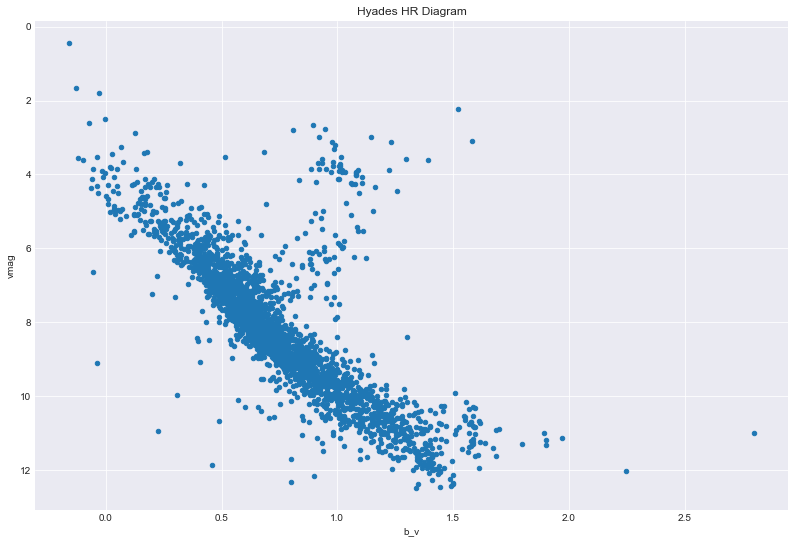

In [2]:
hyades = pd.read_csv("hyades.csv")
col_hyades = hyades.columns 
hyades = hyades[hyades[col_hyades[-1]] != 0]
print(col_hyades)
hyades.plot( col_hyades[-1], col_hyades[1],kind = "scatter", figsize = [9*1.5, 6*1.5])
plt.grid(True)
plt.gca().invert_yaxis()
plt.title("Hyades HR Diagram")
plt.show()

def f(x,m,c):
    return m*x+c

def rejectOutliersAndFit(df, xName, yName, model, rejThres = 0.1, iters = 10):
    assert iters >= 1, print("Number of iterations must be greater than 1")
    param, cov = curve_fit(model, df[xName], df[yName])
    for i in range(0,iters):
        df["relDistance"] = abs((df[yName]-model(df[xName], *param))*(1/model(df[xName], *param)))
        df = df[df["relDistance"] <= rejThres]
        param, cov = curve_fit(model, df[xName], df[yName])
    return df, param, cov

stdDistance = 46.327471
hyades["vmag"] = hyades["vmag"] - 5*np.log10(stdDistance/10)
hyadesModified, paramHyades, covHyades = rejectOutliersAndFit(hyades, "b_v", "vmag", f)
slopeHyades = paramHyades[0]

def getDistance(clusterDF, clusterName, xName, yName, rejThres=0.1, iters=10):
    
    def modelForClusters(x, c):
        return slopeHyades*x + c
    
    c1, c2, c3, c4 = "red", "black", "green", "#025d95"
    display(Markdown("**The color magnitude diagram after removing the outliers and fitting**"))
    clusterDFModified, paramCluster, covCluster = rejectOutliersAndFit(clusterDF, xName, yName, modelForClusters, rejThres, iters)
    ax3=clusterDFModified.plot.scatter(x=xName, y=yName, label=clusterName, color = c1,figsize=[9*1.5, 6*1.5], fontsize=15)
    ax4=hyadesModified.plot.scatter(x="b_v", y="vmag", label="Hyades", color=c2, figsize=[9*1.5, 6*1.5], fontsize=15,ax=ax3)
    ax3.invert_yaxis()
    xH = np.linspace(min(hyadesModified["b_v"]), max(hyadesModified["b_v"]), 10)
    xC = np.linspace(min(clusterDFModified[xName]), max(clusterDFModified[xName]), 10)
    plt.plot(xH, f(xH, *paramHyades), label="Hyades Best Fit", color = c3)
    plt.plot(xC, modelForClusters(xC, *paramCluster), label=clusterName + " Best Fit", color=c4)
    plt.xlabel("B-V",fontsize=15)
    plt.ylabel("Vmag",fontsize=15)
    plt.legend()
    plt.grid()
    plt.show()
    
    offset = paramCluster[0]-paramHyades[1]
    distance = 10*(10**(offset/5))
    print("The following  is the covariance matrix-")
    print(covCluster)
    print("---------------------------------")
    print("Intercept of the standard Hyades Main Sequence Fitting =", paramHyades[1])
    print("Intercept of the",clusterName+"\'s Main Sequence Fitting =", paramCluster[0])
    print("Distance of the star =", distance,"pc")

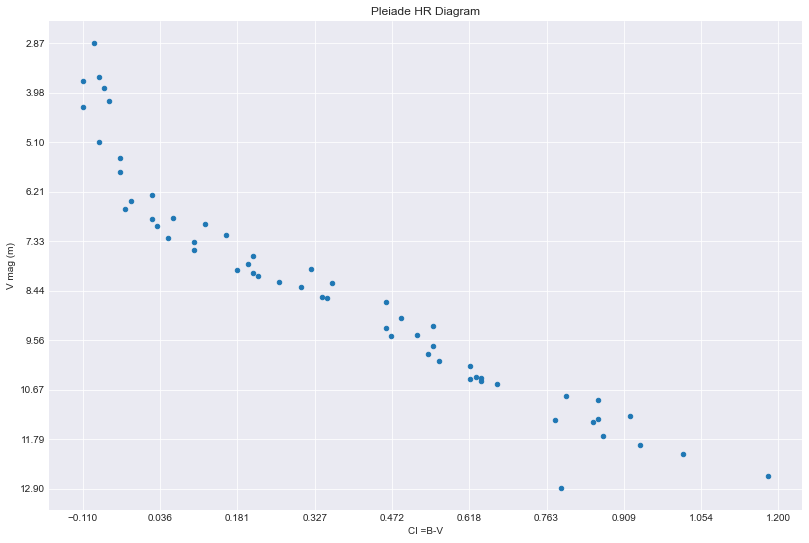

**The color magnitude diagram after removing the outliers and fitting**

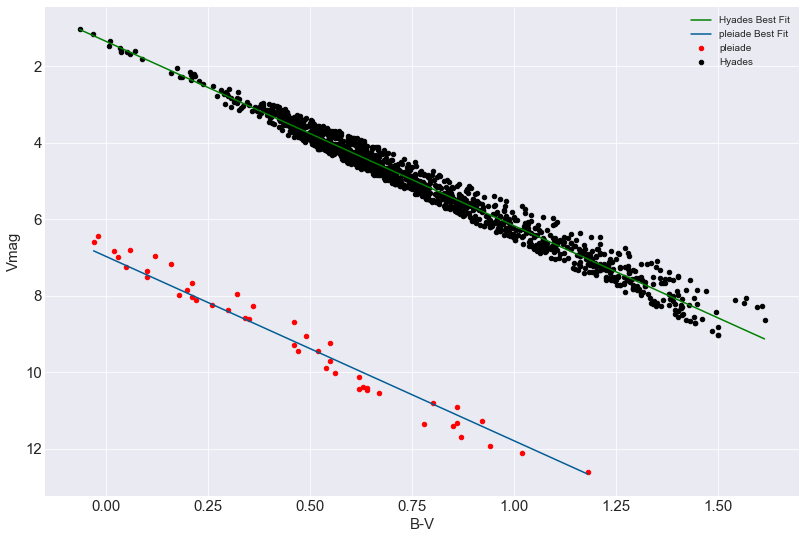

The following  is the covariance matrix-
[[0.00220517]]
---------------------------------
Intercept of the standard Hyades Main Sequence Fitting = 1.3446896738982683
Intercept of the pleiade's Main Sequence Fitting = 6.971080244570183
Distance of the star = 133.437566805419 pc


In [3]:
pleiade = pd.read_csv("pleiadesdata.csv")
col_ple = pleiade.columns 
pleiade.plot(col_ple[3], col_ple[1], kind = "scatter", figsize = [9*1.5, 6*1.5])
plt.grid(True)
plt.gca().invert_yaxis()
plt.yticks(np.linspace(2.87, 12.9, 10))
plt.xticks(np.linspace(-0.11, 1.2, 10))
plt.title("Pleiade HR Diagram")
plt.show()

getDistance(pleiade, "pleiade", col_ple[3], col_ple[1], rejThres=0.1, iters=10)

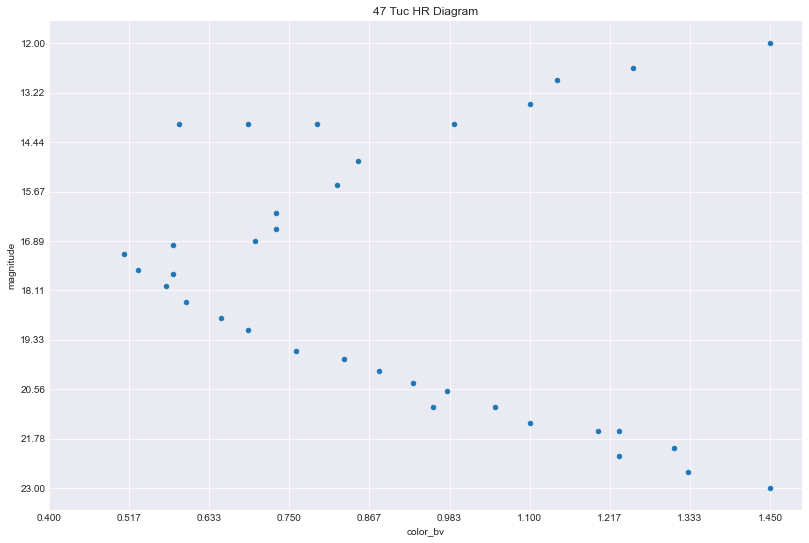

**The color magnitude diagram after removing the outliers and fitting**

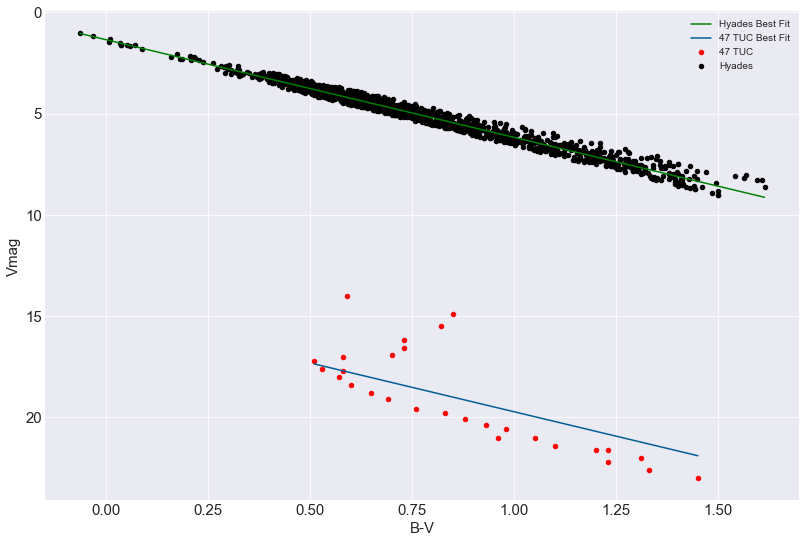

The following  is the covariance matrix-
[[0.09360764]]
---------------------------------
Intercept of the standard Hyades Main Sequence Fitting = 1.3446896738982683
Intercept of the 47 TUC's Main Sequence Fitting = 14.898776610244724
Distance of the star = 5138.27551249332 pc


In [4]:
tuc47 = pd.read_csv("47tuc.csv")
col_tuc = tuc47.columns 
tuc47.plot(col_tuc[2], col_tuc[1], kind = "scatter", figsize = [9*1.5, 6*1.5])
plt.grid(True)
plt.gca().invert_yaxis()
plt.yticks(np.linspace(12.0, 23, 10))
plt.xticks(np.linspace(0.4, 1.45, 10))
plt.title("47 Tuc HR Diagram")
plt.show()

getDistance(tuc47, "47 TUC", col_tuc[2], col_tuc[1], rejThres = 0.22, iters=10)

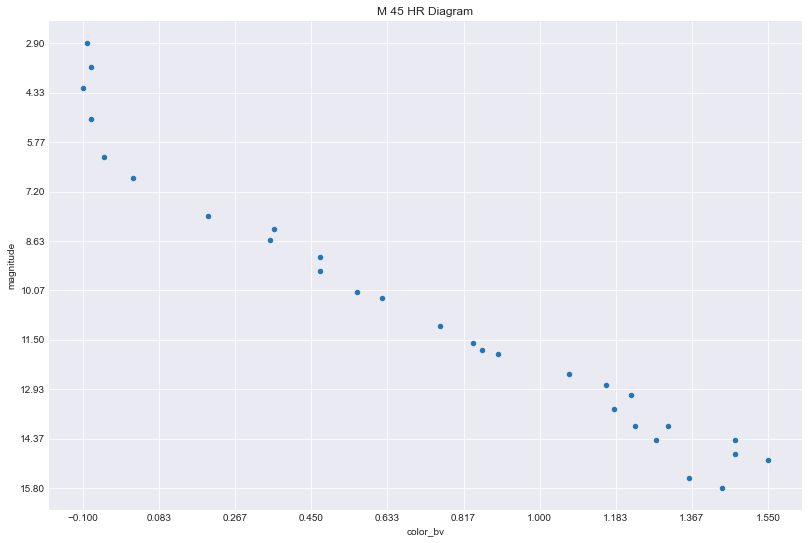

**The color magnitude diagram after removing the outliers and fitting**

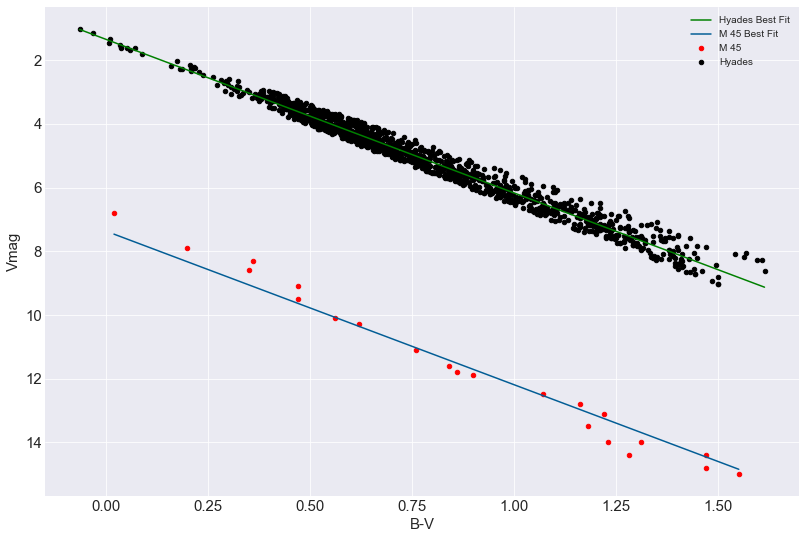

The following  is the covariance matrix-
[[0.00787575]]
---------------------------------
Intercept of the standard Hyades Main Sequence Fitting = 1.3446896738982683
Intercept of the M 45's Main Sequence Fitting = 7.368060891995233
Distance of the star = 160.20432764224725 pc


In [5]:
m45 = pd.read_csv("m45.csv")
col_m45 = m45.columns 
m45.plot(col_m45[2], col_m45[1], kind = "scatter", figsize = [9*1.5, 6*1.5])
plt.grid(True)
plt.yticks(np.linspace(2.9, 15.8, 10))
plt.xticks(np.linspace(-0.1, 1.55, 10))
plt.gca().invert_yaxis()
plt.title("M 45 HR Diagram")
plt.show()

getDistance(m45, "M 45", col_m45[2], col_m45[1], rejThres=0.1, iters=10)

### Question 2

In [6]:
## From Figure 1:
P = 5.366
Mv = -2.43*((np.log(P)/np.log(10)) - 1) - 4.05
mv = 4.1  ## value form internet
r = 10**((mv-Mv+5)/5)

print("The distance of first δ Cephei is r = {} pc \n".format(r))

P = 31.394
Mv = -2.43*((np.log(P)/np.log(10)) - 1) - 4.05
mv =  19.2   ## value form internet
r = 10**((mv-Mv+5)/5)
print("The distance of second δ Cephei is r = {} pc \n".format(r))

The distance of first δ Cephei is r = 315.2174306855089 pc 

The distance of second δ Cephei is r = 778874.4791004851 pc 

